**Problem Statement: Analysing two data set IPL Ball By Ball of year 2021 and 2022 for the purpose of determining the chances of the team to win **

**Mounting Drive with Colab**

In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries 

**Problem Statement**:
In this python notebook, analysis of IPL matches played in 2022 is done using python packages like pandas, matplotlib and seaborn. We have conducted an exploratory data analysis on two different datasets, for the purpose of determining what factors may have an impact on a teams chances of winning. The factors we chose to analyze are as follows: Win rate, number of games played, result of the pre-game coin toss, and the venue. We were also curious to know about additional factors, such as: highest performing players.

In [87]:
import pandas as pd                               # For data manipulation and analysis.
import seaborn as sns                             # Provides a high level interface for drawing attractive and informative statistical graphics.
from statistics import mean, median, mode, stdev  # To calculate mathematical statistics of numeric data.
import matplotlib.pyplot as plt                   # Plotting library for Python programming language and it's numerical mathematics extension NumPy.
import numpy as np                                # Implemennts milti-dimensional array and matrices.
import math as m                                  # This module provides access to the mathematical functions.
import plotly.express as px                       # Functions that can create entire figures at once.
%matplotlib inline

In [88]:
import os
path = '/content/drive/MyDrive/py midterm'
os.chdir(path)
import omkar as om

In [89]:
B_B=pd.read_csv('/content/drive/MyDrive/py midterm/IPL_Ball_by_Ball_2022.csv')
M_D=pd.read_csv('/content/drive/MyDrive/py midterm/IPL_Matches_2022.csv')


**DataSet**

In [90]:
B_B

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,1304047,2,17,5,SS Iyer,DJ Bravo,SP Jackson,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17908,1304047,2,17,6,SP Jackson,DJ Bravo,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17909,1304047,2,18,1,SP Jackson,AF Milne,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17910,1304047,2,18,2,SS Iyer,AF Milne,SP Jackson,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [91]:
M_D               

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


**Checking the Datatype of the columns**

In [92]:
print(B_B.dtypes)                                                      # DataType of each column.

ID                    int64
innings               int64
overs                 int64
ballnumber            int64
batter               object
bowler               object
non-striker          object
extra_type           object
batsman_run           int64
extras_run            int64
total_run             int64
non_boundary          int64
isWicketDelivery      int64
player_out           object
kind                 object
fielders_involved    object
BattingTeam          object
dtype: object


In [93]:
print(M_D.dtypes)

ID                   int64
City                object
Date                object
Season               int64
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin               int64
method             float64
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object


**Understanging the DataSetbold text**

In [94]:
B_B.shape                         #The shape of a DataSet is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(17912, 17)

In [95]:
M_D.shape

(74, 20)

In [96]:
B_B.columns                      # The columns of a DataSet tells the name of all columns names 

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [97]:
M_D.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [98]:
B_B.head()                        #This function returns the first n rows for the object based on position top.

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [99]:
M_D.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [100]:
B_B.tail()                         #This function returns the first n rows for the object based on position down.

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
17907,1304047,2,17,5,SS Iyer,DJ Bravo,SP Jackson,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17908,1304047,2,17,6,SP Jackson,DJ Bravo,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17909,1304047,2,18,1,SP Jackson,AF Milne,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17910,1304047,2,18,2,SS Iyer,AF Milne,SP Jackson,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17911,1304047,2,18,3,SS Iyer,AF Milne,SP Jackson,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [101]:
M_D.tail()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid
73,1304047,Mumbai,2022-03-26,2022,1,Chennai Super Kings,Kolkata Knight Riders,"Wankhede Stadium, Mumbai",Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,6,NaN,UT Yadav,"['RD Gaikwad', 'DP Conway', 'RV Uthappa', 'AT ...","['AM Rahane', 'VR Iyer', 'N Rana', 'SS Iyer', ...",AK Chaudhary,Nitin Menon


In [102]:
B_B.info()                   #The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 16  BattingTeam        17912 non-null  objec

In [103]:
M_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               74 non-null     int64  
 1   City             74 non-null     object 
 2   Date             74 non-null     object 
 3   Season           74 non-null     int64  
 4   MatchNumber      74 non-null     object 
 5   Team1            74 non-null     object 
 6   Team2            74 non-null     object 
 7   Venue            74 non-null     object 
 8   TossWinner       74 non-null     object 
 9   TossDecision     74 non-null     object 
 10  SuperOver        74 non-null     object 
 11  WinningTeam      74 non-null     object 
 12  WonBy            74 non-null     object 
 13  Margin           74 non-null     int64  
 14  method           0 non-null      float64
 15  Player_of_Match  74 non-null     object 
 16  Team1Players     74 non-null     object 
 17  Team2Players     7

In [104]:
B_B.describe().T          #For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles.The 50 percentile is the same as the median.

,count,mean,std,min,25%,50%,75%,max
ID,17912.0,1.304524e+06,1843.445952,1304047.0,1304065.0,1304084.0,1304102.0,1312200.0
innings,17912.0,1.485317e+00,0.499798,1.0,1.0,1.0,2.0,2.0
overs,17912.0,9.290085e+00,5.690914,0.0,4.0,9.0,14.0,19.0
ballnumber,17912.0,3.652077e+00,1.837818,1.0,2.0,4.0,5.0,10.0
batsman_run,17912.0,1.286958e+00,1.701842,0.0,0.0,1.0,1.0,6.0
extras_run,17912.0,7.497767e-02,0.372878,0.0,0.0,0.0,0.0,5.0
total_run,17912.0,1.361936e+00,1.688991,0.0,0.0,1.0,1.0,7.0
non_boundary,17912.0,1.674855e-04,0.012941,0.0,0.0,0.0,0.0,1.0
isWicketDelivery,17912.0,5.091559e-02,0.219831,0.0,0.0,0.0,0.0,1.0


In [105]:
M_D.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,74.0,1.304520e+06,1848.085956,1304047.0,1304065.25,1304083.5,1304101.75,1312200.0
Season,74.0,2.022000e+03,0.000000,2022.0,2022.00,2022.0,2022.00,2022.0
Margin,74.0,1.697297e+01,19.651047,2.0,5.25,8.0,18.00,91.0
method,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3) Searching for Null, Missing, Unwanted values**

In [106]:
om.find_null_values(M_D)            #Null Values by fuction call 

No of Null Values: ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64


In [107]:
om.find_null_values(B_B)

No of Null Values: ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64


In [108]:
B_B.isna().sum()                 #isna()calculates all the missing values and sum() calculates the sum of elements for each row and column.

ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   0
non-striker              0
extra_type           16862
batsman_run              0
extras_run               0
total_run                0
non_boundary             0
isWicketDelivery         0
player_out           17000
kind                 17000
fielders_involved    17208
BattingTeam              0
dtype: int64

In [109]:
M_D.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [110]:
B_B.columns.unique()               #Number of unique values in columns of data set  

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [111]:
M_D.columns.unique()

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

**Serching for Duplicate Values**

In [161]:
B_B.duplicated().sum()                   #Duplicate in columns

0

In [162]:
M_D.duplicated().sum()

0

**Total Numbers of matches played by each Team**

In [116]:
total_mactches = M_D['Team1'].value_counts() + M_D['Team2'].value_counts()
total_mactches

Chennai Super Kings            14
Delhi Capitals                 14
Gujarat Titans                 16
Kolkata Knight Riders          14
Lucknow Super Giants           15
Mumbai Indians                 14
Punjab Kings                   14
Rajasthan Royals               17
Royal Challengers Bangalore    16
Sunrisers Hyderabad            14
dtype: int64

**Number of matches Win**

In [117]:
win =M_D.groupby('WinningTeam').count()
win['ID']

WinningTeam
Chennai Super Kings             4
Delhi Capitals                  7
Gujarat Titans                 12
Kolkata Knight Riders           6
Lucknow Super Giants            9
Mumbai Indians                  4
Punjab Kings                    7
Rajasthan Royals               10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             6
Name: ID, dtype: int64

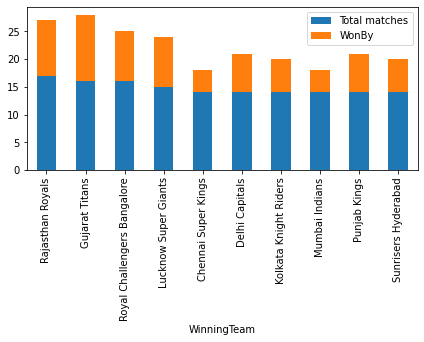

In [118]:
om.win_total_maches(M_D, win, total_mactches)   

****

In [119]:
most_runs = B_B.groupby(['ID'])['total_run'].sum().reset_index()      #Run scored by both teams in a match  according match sequence 
most_runs

,ID,total_run
0,1304047,264
1,1304048,356
2,1304049,413
3,1304050,319
4,1304051,359
...,...,...
69,1304116,317
70,1312197,379
71,1312198,400
72,1312199,318


In [120]:
om.runs_scored_ascending(most_runs)            #Runs scored by both teams in ascending order according to runs 

         ID  total_run
35  1304082        140
58  1304105        200
56  1304103        226
31  1304078        234
38  1304085        259
..      ...        ...
2   1304049        413
65  1304112        418
6   1304053        421
29  1304076        427
33  1304080        429

[74 rows x 2 columns]


**Fuctions for plot**

In [185]:
def histo(B_B):
  
   fig = px.histogram(B_B, x='total_run')
   fig.show()

def box(B_B):
   fig = px.box(B_B, y='batsman_run')
   fig.show()

def hist(M_D):
   fig = px.histogram(M_D, x='WonBy')
   fig.show()

def countplot(M_D):
  plt.figure(figsize=(20,10))
  sns.countplot(x ='TossWinner', data = M_D)

def barplot(M_D):
  sns.barplot(y ='overs', x ='extras_run' , data = M_D)
   
def relplot(B_B):
  sns.relplot(x ="overs", y ="batsman_run",
  data = B_B);


In [122]:
histo(B_B)                                            #count of runs (0,1,2,3,4,5,6) scorred on every balls

In [165]:
box(B_B)

In [124]:
hist(M_D)

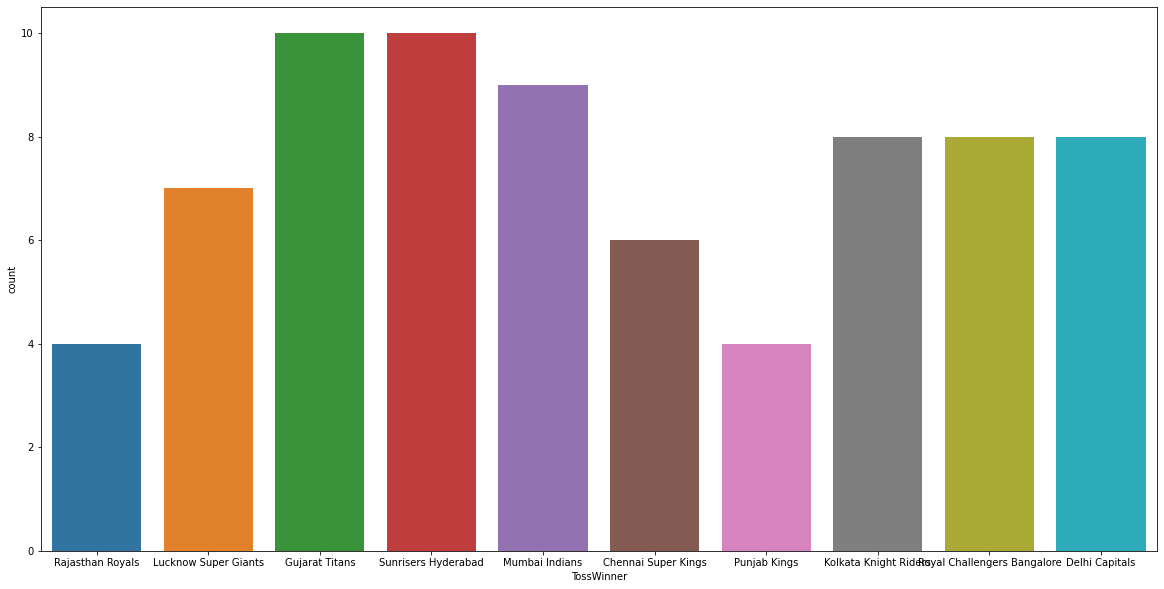

In [177]:
countplot(M_D)

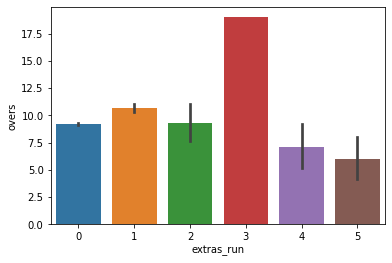

In [186]:
barplot(B_B)

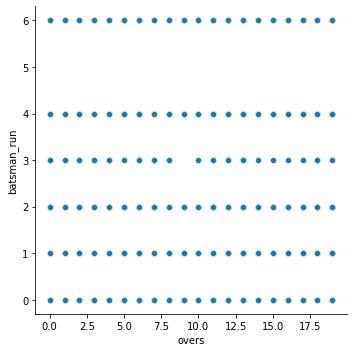

In [127]:
relplot(B_B)

**5) Checking for Outliers using Boxplot**

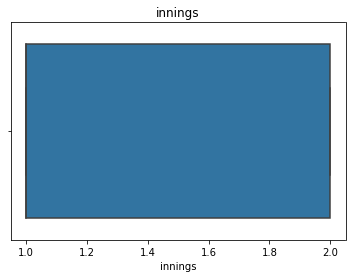

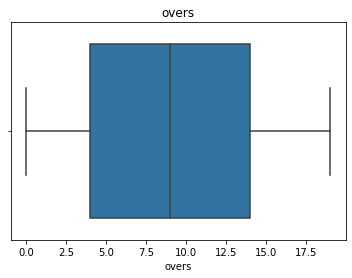

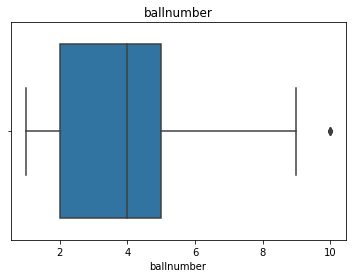

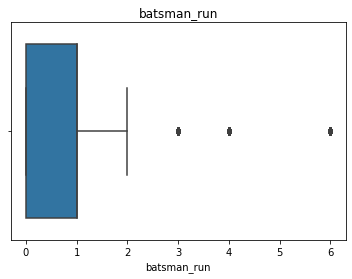

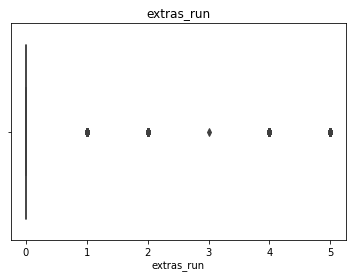

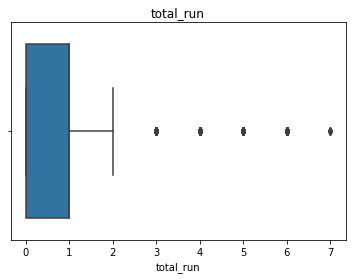

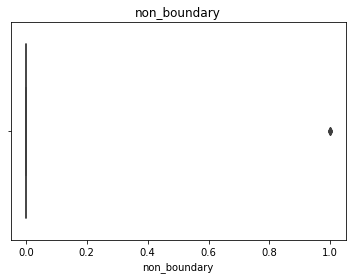

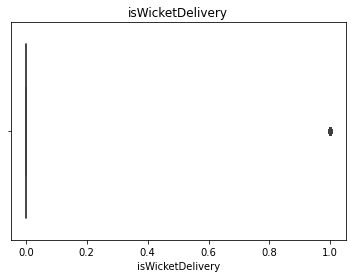

In [128]:
for column in B_B[['innings','overs','ballnumber','batsman_run','extras_run','total_run','non_boundary','isWicketDelivery']]:
    plt.title(column)
    sns.boxplot(data=B_B, x=column)
    plt.show()

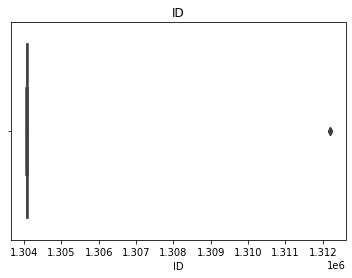

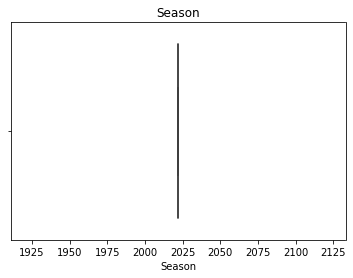

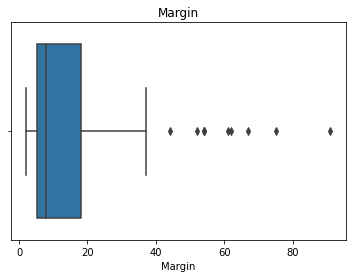

In [129]:
for column2 in M_D[['ID','Season','Margin']]:
    plt.title(column2)
    sns.boxplot(data=M_D, x=column2)
    plt.show()

**Team won by hightes Margin**

In [130]:
M_D.iloc[M_D['Margin'].idxmax()]

ID                                                           1304101
City                                                     Navi Mumbai
Date                                                      2022-05-08
Season                                                          2022
MatchNumber                                                       55
Team1                                            Chennai Super Kings
Team2                                                 Delhi Capitals
Venue                             Dr DY Patil Sports Academy, Mumbai
TossWinner                                            Delhi Capitals
TossDecision                                                   field
SuperOver                                                          N
WinningTeam                                      Chennai Super Kings
WonBy                                                           Runs
Margin                                                            91
Player_of_Match                   

In [131]:
M_D.iloc[M_D['Margin'].idxmin()]

ID                                                           1304112
City                                                     Navi Mumbai
Date                                                      2022-05-18
Season                                                          2022
MatchNumber                                                       66
Team1                                           Lucknow Super Giants
Team2                                          Kolkata Knight Riders
Venue                             Dr DY Patil Sports Academy, Mumbai
TossWinner                                      Lucknow Super Giants
TossDecision                                                     bat
SuperOver                                                          N
WinningTeam                                     Lucknow Super Giants
WonBy                                                           Runs
Margin                                                             2
Player_of_Match                   

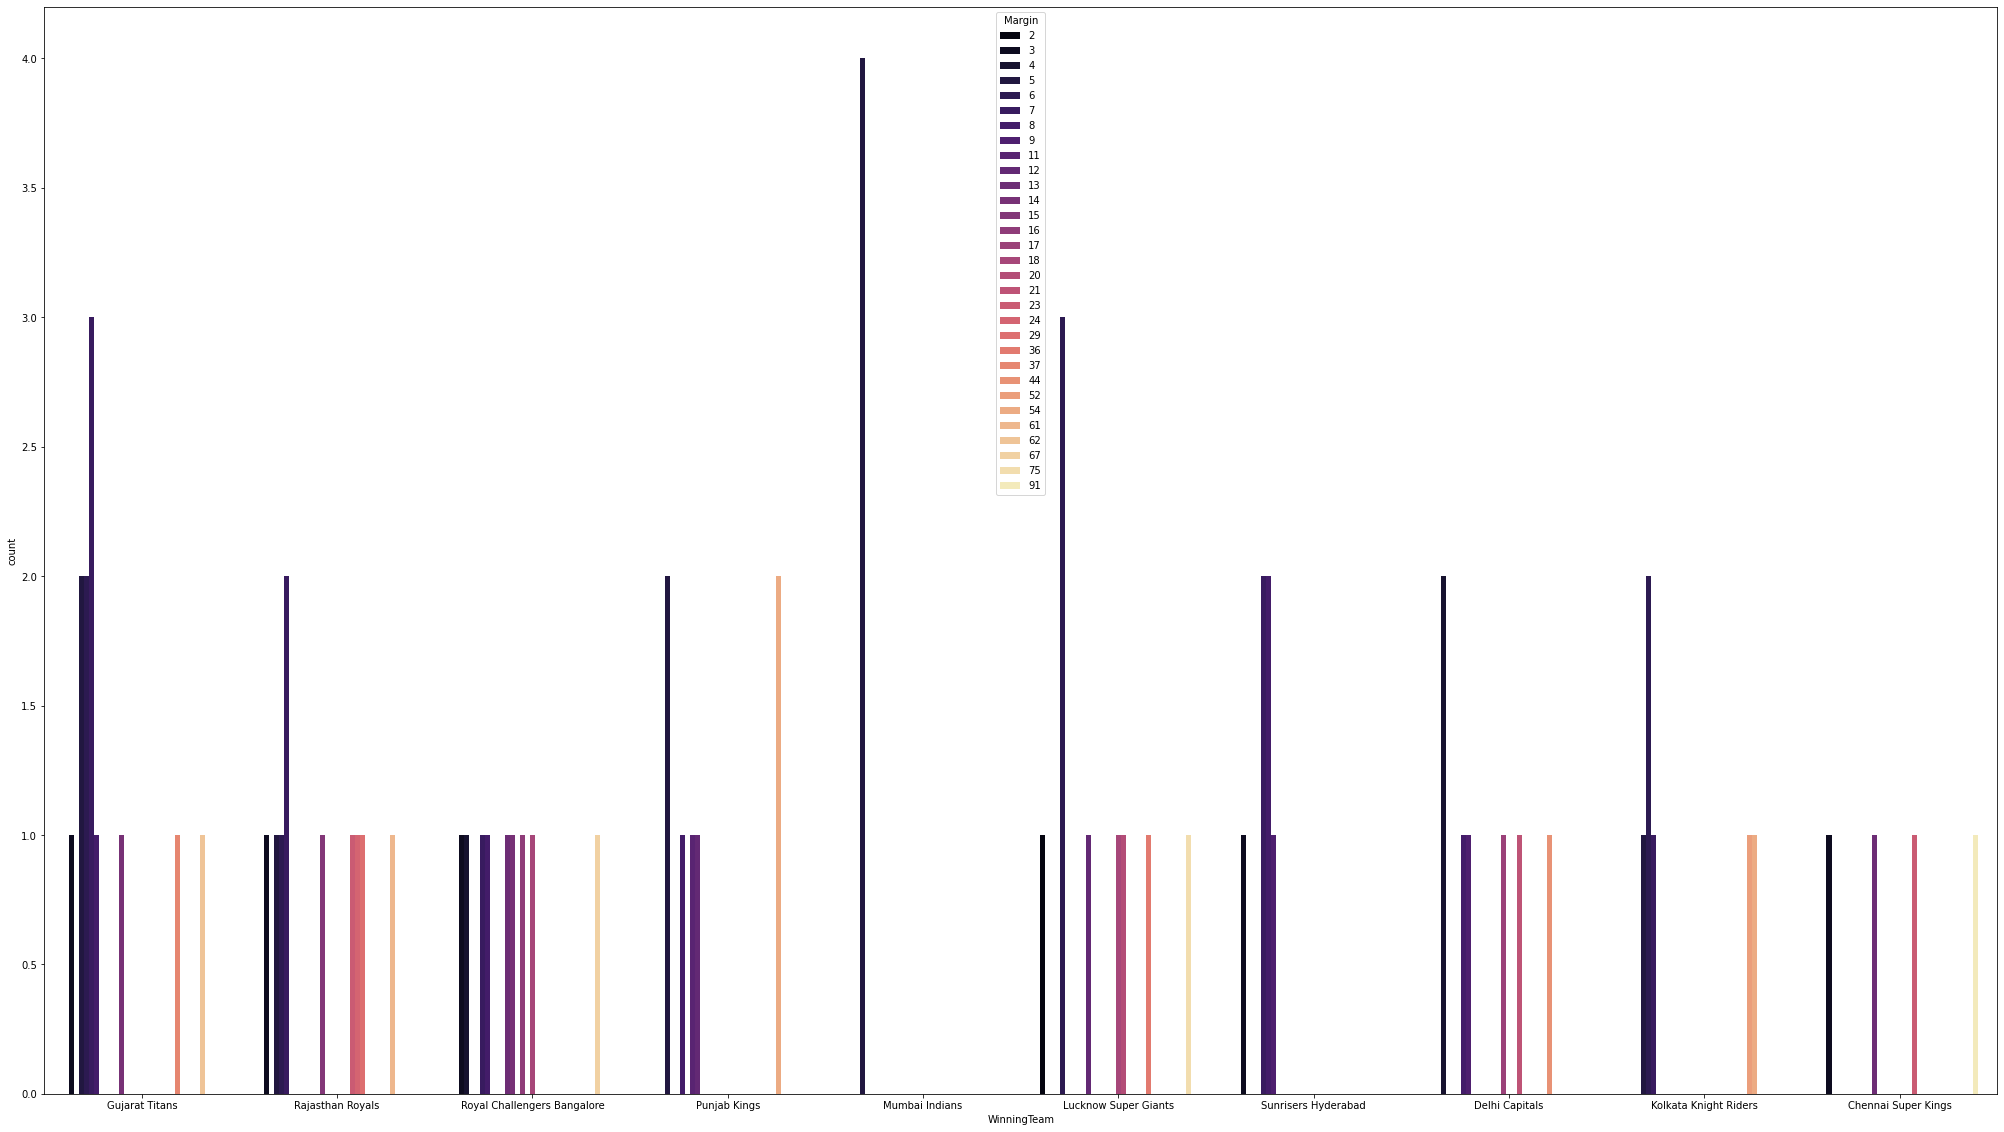

In [187]:
plt.figure(figsize=(35,20))
sns.countplot(x ='WinningTeam', data= M_D, hue= 'Margin', palette= 'magma')


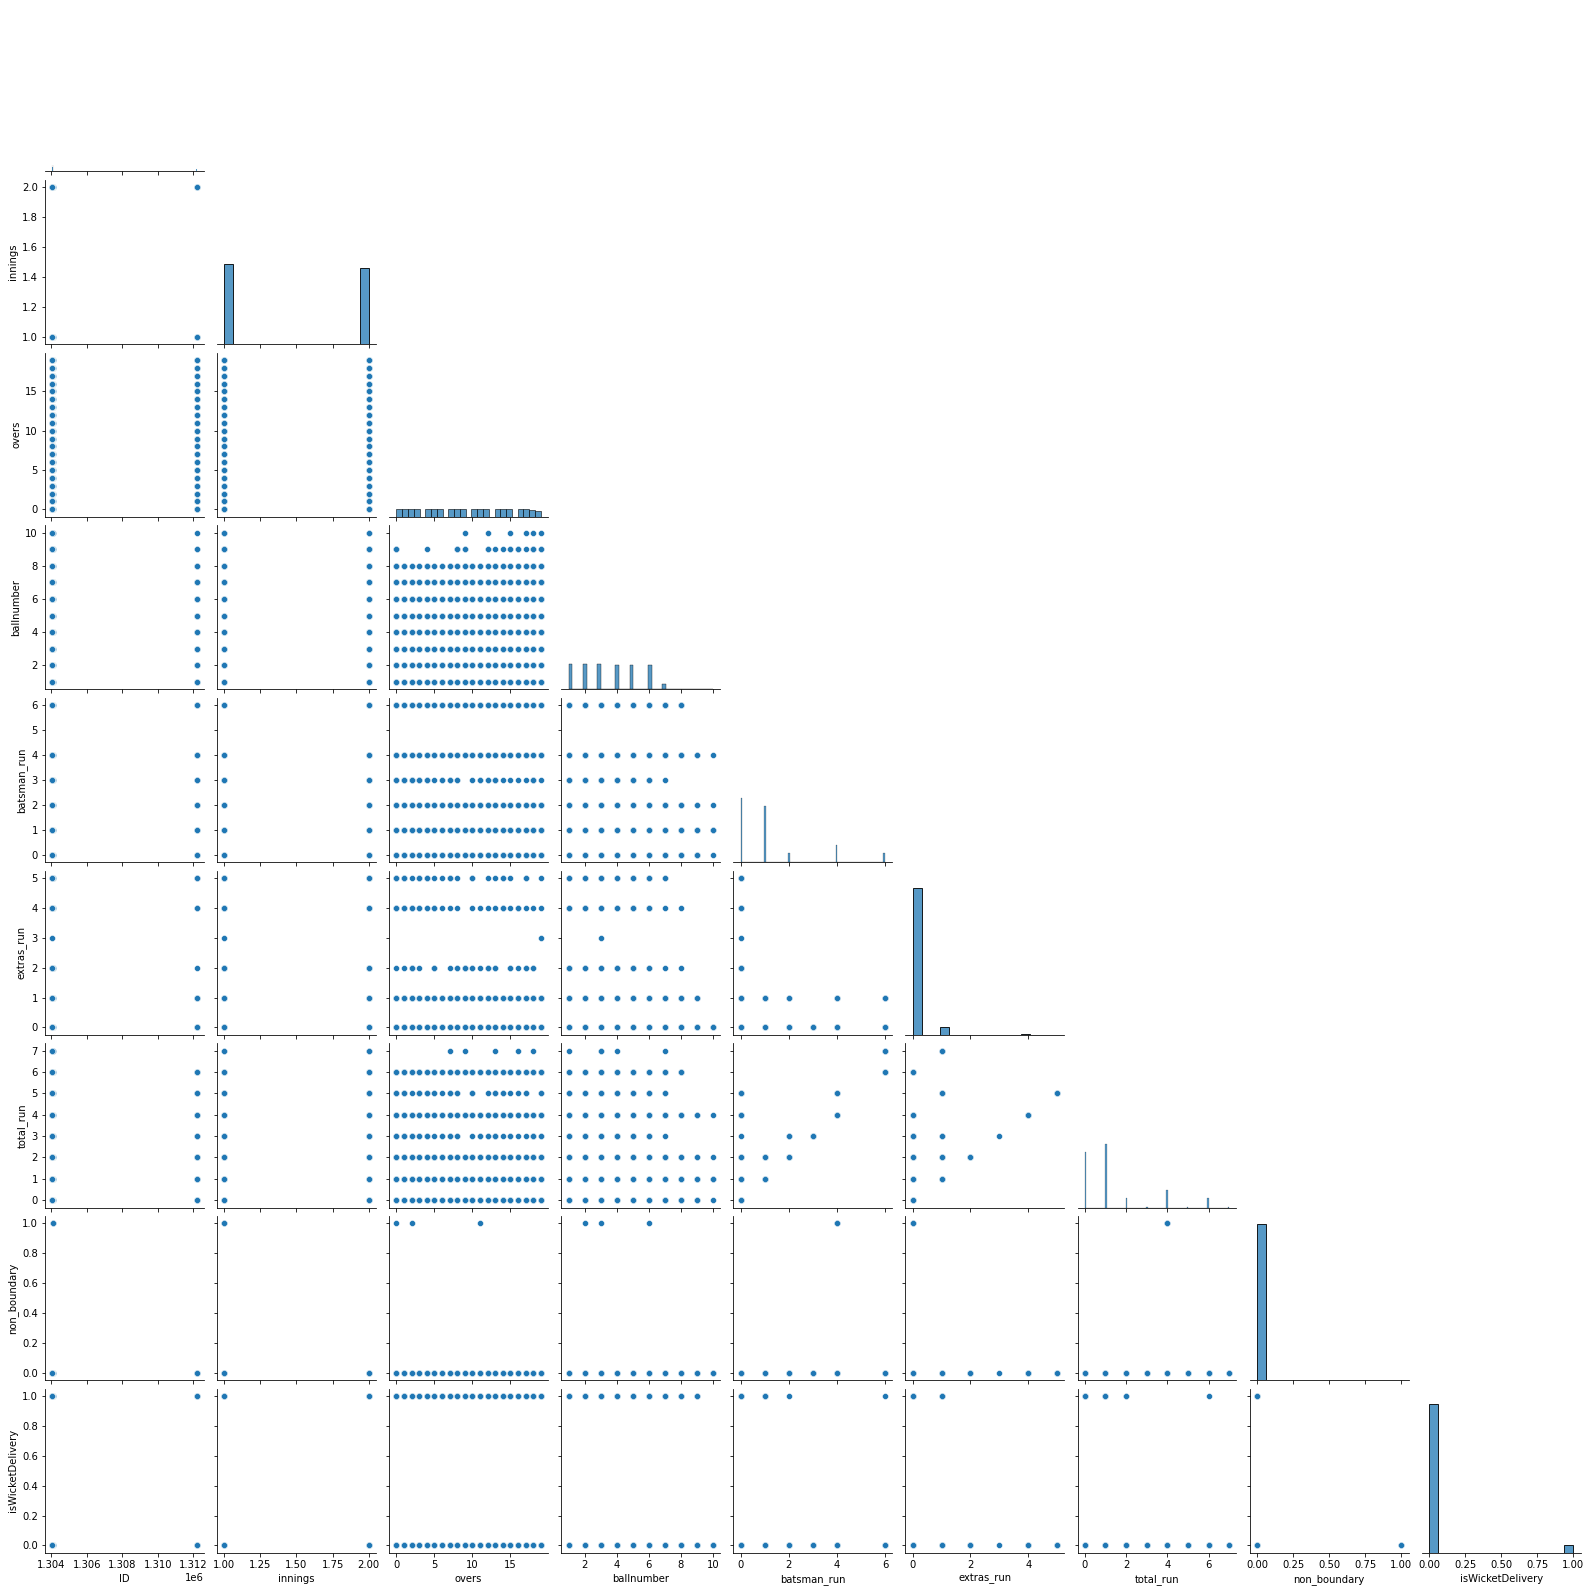

In [133]:
sns.pairplot(B_B, palette="twilight", corner=True);

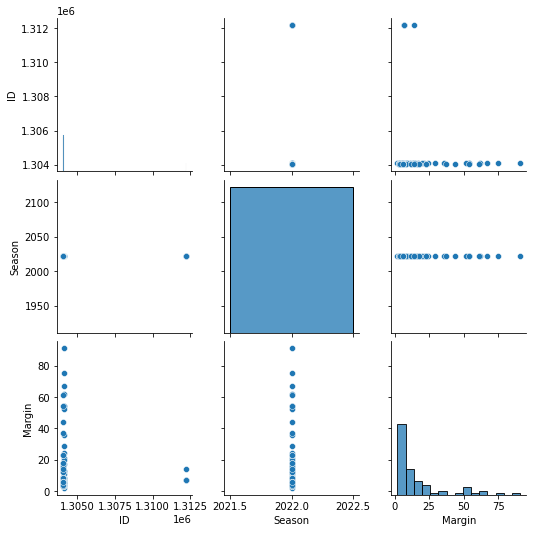

In [134]:
sns.pairplot(M_D)

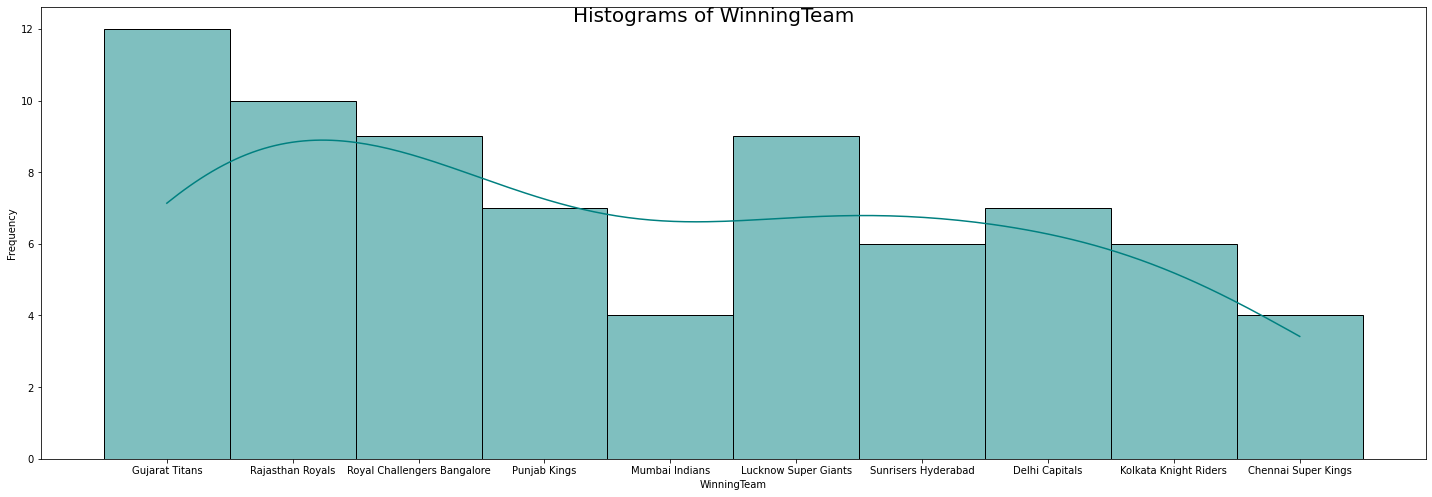

In [135]:
plt.figure(figsize=(20,7))
plt.suptitle('Histograms of WinningTeam ', fontsize = 20)
ax1 = sns.histplot(x = M_D['WinningTeam'],color= 'teal', bins= 15, kde= True, palette= 'crest')
ax1.set(xlabel= 'WinningTeam', ylabel= 'Frequency')
plt.tight_layout()
plt.show()

**7) Heatmap for correlation **

In [136]:
def scatterprint(*args):
    try: 
        plt.figure(figsize=(6,6))
        sns.scatterplot(data = args[0], x=args[1], y=args[2], hue="liking")
    except Exception as e:
        print("ERROR: ", str(e))
        pass

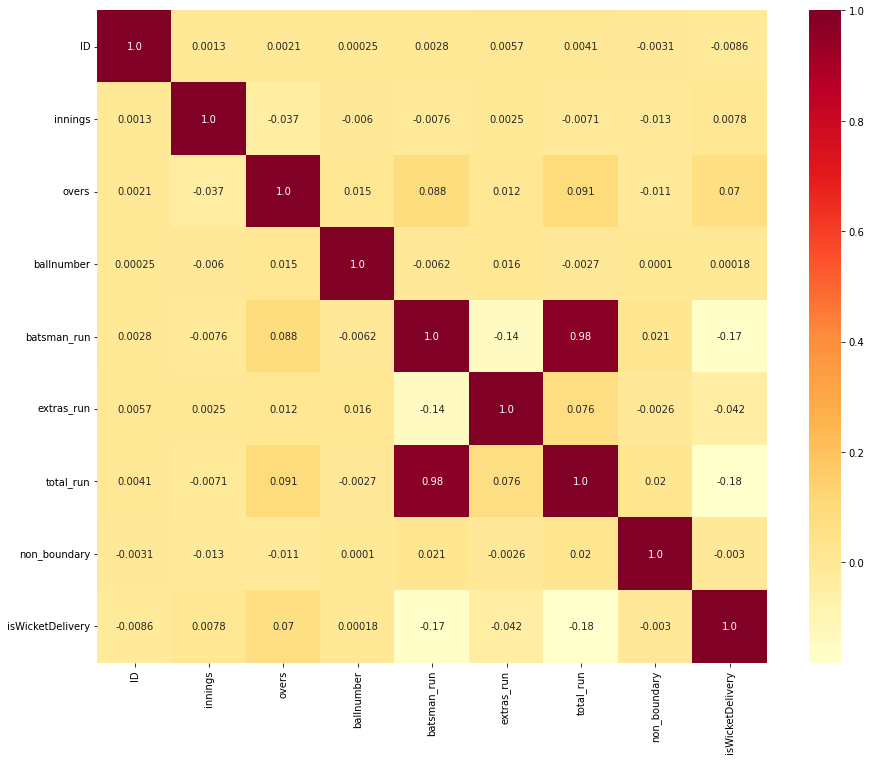

In [137]:
plt.figure(figsize = (15,12))
correlation=B_B.corr()
sns.heatmap(correlation, annot=True,fmt='.2', cmap='YlOrRd')

**Most IPL Runs by a Batsman**

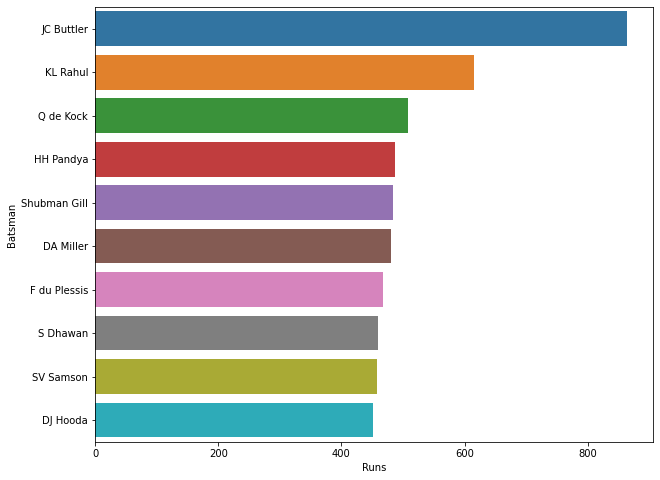

In [138]:
plt.figure(figsize=(10,8))
data = B_B.groupby(['batter'])['batsman_run'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

In [139]:
Toss = M_D['TossWinner'] == M_D['WinningTeam']
Toss.groupby(Toss).size()

False    38
True     36
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



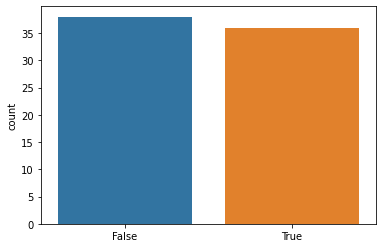

In [140]:
sns.countplot(M_D['TossWinner'] == M_D['WinningTeam'])
sns.countplot(Toss);

In [141]:
runs = B_B.groupby(['batter','ID'])['batsman_run'].sum()
runs[runs >= 100].droplevel(level=1).groupby('batter').count().sort_values(ascending=False)[:10]

batter
JC Buttler    4
KL Rahul      2
Q de Kock     1
RM Patidar    1
Name: batsman_run, dtype: int64

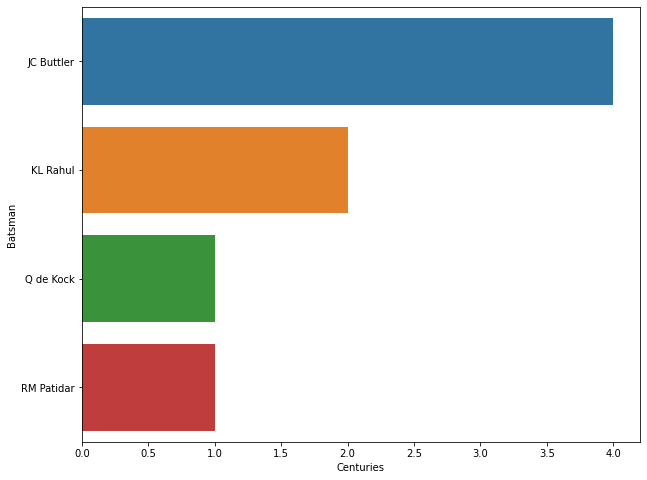

In [142]:
plt.figure(figsize=(10,8))
runs = B_B.groupby(['batter','ID'])['batsman_run'].sum()
data = runs[runs >= 100].droplevel(level=1).groupby('batter').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Centuries')
plt.ylabel('Batsman')
plt.show()

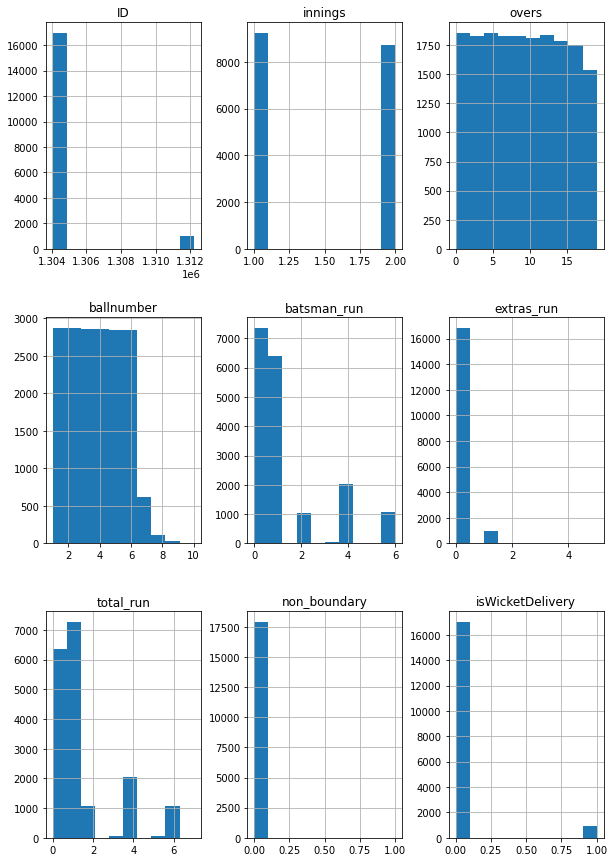

In [143]:
B_B.hist(figsize=(10,15))
plt.show()

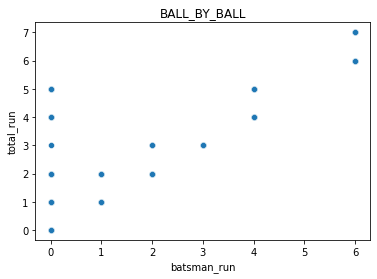

In [144]:
sns.scatterplot(x =B_B['batsman_run'], y =B_B['total_run']);
plt.title('BALL_BY_BALL')
plt.show();

**Merging Two Data set**

In [145]:
result = pd.concat([B_B, M_D], axis=1, join='inner')
display(result)
result.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,field,N,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,field,N,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,field,N,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1312200,1,11,4,JC Buttler,Rashid Khan,D Padikkal,NaN,1,0,...,field,N,Rajasthan Royals,Runs,61,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1312200,1,11,5,D Padikkal,Rashid Khan,JC Buttler,NaN,0,0,...,field,N,Gujarat Titans,Wickets,5,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1312200,1,11,6,SO Hetmyer,Rashid Khan,JC Buttler,NaN,0,0,...,field,N,Punjab Kings,Wickets,5,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1312200,1,12,1,JC Buttler,HH Pandya,SO Hetmyer,NaN,0,0,...,field,N,Delhi Capitals,Wickets,4,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,field,N,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [146]:
M_D.WonBy.value_counts()

Wickets    37
Runs       37
Name: WonBy, dtype: int64

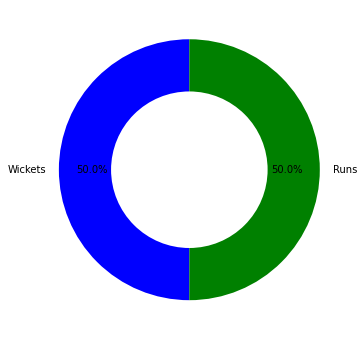

In [147]:
plt.figure(figsize=(6,6))
sizes = result.WonBy.value_counts()
labels = result.WonBy.value_counts().index
plt.pie(sizes,colors = ['b','g','r'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

**Slicing of data**

In [148]:
M_D['Player_of_Match'].to_frame().head()

,Player_of_Match
0,HH Pandya
1,JC Buttler
2,RM Patidar
3,DA Miller
4,Harpreet Brar


In [149]:
M_D.Player_of_Match.iloc[0:8]


0        HH Pandya
1       JC Buttler
2       RM Patidar
3        DA Miller
4    Harpreet Brar
5        JJ Bumrah
6         R Ashwin
7          V Kohli
Name: Player_of_Match, dtype: object

**Upload data to Numerical Python (NumPy)**

In [150]:
result1 = M_D.to_numpy()
print(result1)


[[1312200 'Ahmedabad' '2022-05-29' ...
  "['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']"
  'CB Gaffaney' 'Nitin Menon']
 [1312199 'Ahmedabad' '2022-05-27' ...
  "['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']"
  'CB Gaffaney' 'Nitin Menon']
 [1312198 'Kolkata' '2022-05-25' ...
  "['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']"
  'J Madanagopal' 'MA Gough']
 ...
 [1304049 'Mumbai' '2022-03-27' ...
  "['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'LS Livingstone', 'RA Bawa', 'M Shahrukh Khan', 'OF Smith', 'Harpreet Brar', 'Arshdeep Singh', 'Sandeep Sharma', 'RD Chahar']"
  'Nitin Menon' 'YC Barde']
 [1304048 'Mumbai' '2022-03-27' ...
  "['PP Shaw', 'TL Seifert', 'Mandeep Singh',

In [151]:
result2 = B_B.to_numpy()
print(result2)

[[1312200 1 0 ... nan nan 'Rajasthan Royals']
 [1312200 1 0 ... nan nan 'Rajasthan Royals']
 [1312200 1 0 ... nan nan 'Rajasthan Royals']
 ...
 [1304047 2 18 ... nan nan 'Kolkata Knight Riders']
 [1304047 2 18 ... nan nan 'Kolkata Knight Riders']
 [1304047 2 18 ... nan nan 'Kolkata Knight Riders']]


**Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)**

In [152]:
display(B_B.loc[(B_B['isWicketDelivery']>=1)])

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
23,1312200,1,3,6,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,0,0,0,0,1,YBK Jaiswal,caught,R Sai Kishore,Rajasthan Royals
49,1312200,1,8,2,SV Samson,HH Pandya,JC Buttler,NaN,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals
70,1312200,1,11,5,D Padikkal,Rashid Khan,JC Buttler,NaN,0,0,0,0,1,D Padikkal,caught,Mohammed Shami,Rajasthan Royals
72,1312200,1,12,1,JC Buttler,HH Pandya,SO Hetmyer,NaN,0,0,0,0,1,JC Buttler,caught,WP Saha,Rajasthan Royals
89,1312200,1,14,6,SO Hetmyer,HH Pandya,R Ashwin,NaN,0,0,0,0,1,SO Hetmyer,caught and bowled,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17743,1304047,1,10,5,S Dube,AD Russell,RA Jadeja,NaN,0,0,0,0,1,S Dube,caught,SP Narine,Chennai Super Kings
17838,1304047,2,6,2,VR Iyer,DJ Bravo,AM Rahane,NaN,0,0,0,0,1,VR Iyer,caught,MS Dhoni,Kolkata Knight Riders
17860,1304047,2,9,6,N Rana,DJ Bravo,AM Rahane,NaN,0,0,0,0,1,N Rana,caught,AT Rayudu,Kolkata Knight Riders
17870,1304047,2,11,4,AM Rahane,MJ Santner,SS Iyer,NaN,0,0,0,0,1,AM Rahane,caught,RA Jadeja,Kolkata Knight Riders


In [153]:
B_B.extras_run.value_counts()

0    16862
1      942
4       38
5       36
2       33
3        1
Name: extras_run, dtype: int64

In [154]:
mean(B_B.extras_run)

0.07497766860205449

In [155]:
M_D.TossDecision.value_counts()

field    59
bat      15
Name: TossDecision, dtype: int64

In [156]:
M_D = M_D.replace({'field': 0, 'bat': 1})
mean(M_D.TossDecision)

0.20270270270270271

**Avg Run by Teams in Powerplay**

In [157]:
Avg=B_B[B_B['overs']<6].groupby(['ID','BattingTeam']).sum()['total_run'].groupby('BattingTeam').mean().sort_values(ascending=False)[2:]
Avg

BattingTeam
Rajasthan Royals               50.235294
Gujarat Titans                 46.250000
Chennai Super Kings            45.000000
Mumbai Indians                 44.714286
Lucknow Super Giants           44.666667
Kolkata Knight Riders          43.571429
Royal Challengers Bangalore    43.500000
Sunrisers Hyderabad            42.142857
Name: total_run, dtype: float64

In [158]:
B_B.BattingTeam.value_counts()

Rajasthan Royals               2107
Gujarat Titans                 1971
Royal Challengers Bangalore    1965
Lucknow Super Giants           1840
Chennai Super Kings            1719
Punjab Kings                   1712
Mumbai Indians                 1691
Delhi Capitals                 1650
Kolkata Knight Riders          1634
Sunrisers Hyderabad            1623
Name: BattingTeam, dtype: int64

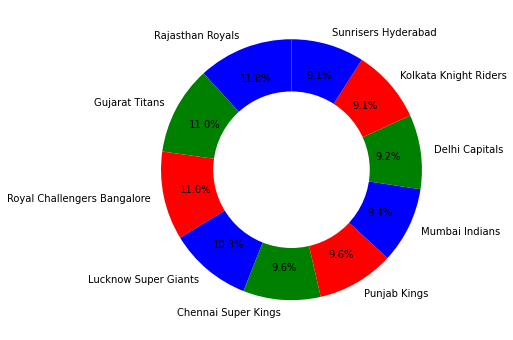

In [159]:
plt.figure(figsize=(6,6))
sizes = B_B.BattingTeam.value_counts()
labels = B_B.BattingTeam.value_counts().index
plt.pie(sizes,colors = ['b','g','r'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)